In [ ]:
# Q: What do these plots and correlation matrix signify?
# A: The correlation measures the strength of a relationship between two variables.
#   In this matrix, it shows the relationshop between #Retweets and other features

# Q: What do the signs (+/-) before the correlation magnitudes signify?
# A: Positive signs (+) means two variables move in the same direction, e.g. one moves up, the other moves up as well
#    Negative signs (-) mean two variables move in the opposite direction

# Q: If a feature shows 0 correlation to #Retweets, does that mean it could not contribute to prediction?
# A: Yes

# Compare the two regression methods:
# I choose Mean Absolute Error as my evaluation metrics
# it measures the average deviation between the estimated value and the actual value |prediction - actual#Retweets in test set|

In [73]:
# import raw data using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('/Users/xiangli/Desktop/95891 AI/HW2/hw2_updated.csv')  

In [74]:
# split Sentiment into 'positive_sentiment' and 'negative_sentiment'
# convert the data type into integer

raw_data['positive_sentiment']=raw_data['Sentiment'].map(lambda x:x.split(" ")[0])
raw_data['positive_sentiment'] = pd.to_numeric(raw_data['positive_sentiment'])
raw_data['negative_sentiment']=raw_data['Sentiment'].map(lambda x:x.split(" ")[1])
raw_data['negative_sentiment'] = pd.to_numeric(raw_data['negative_sentiment'])

# extract post hour
raw_data['time_hour']=pd.to_datetime(raw_data["Timestamp"]).map(lambda x:x.hour)
raw_data['time_hour'] = pd.to_numeric(raw_data['time_hour'])

# extract number of mentions
def count_words(x): 
    if str(x)=="null;":
        return 0 
    else:
        return len(str(x).split(" "))
raw_data['num_memtions']=raw_data["Mentions"].apply(count_words)
raw_data['num_memtions'] = pd.to_numeric(raw_data['num_memtions'])

# extract number of hashtags
raw_data['num_hashtags']=raw_data["Hashtags"].apply(count_words)
raw_data['num_hashtags'] = pd.to_numeric(raw_data['num_hashtags'])

# deal with the null value
raw_data.fillna(0)

,Tweet ID,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs,positive_sentiment,negative_sentiment,time_hour,num_memtions,num_hashtags
0,1178791787386814465,35234fe4a19cc1a3336095fb3780bcc1,Mon Sep 30 22:00:37 +0000 2019,619,770,0,0,null;,2 -1,null;,null;,null;,2,-1,22,0,0
1,1178791985106153472,ea4592f39636d87af8fb4b17b7e2e4c0,Mon Sep 30 22:01:24 +0000 2019,36365,19344,13,17,nazi:Nazism:-2.742538749414189;blood money:Blo...,1 -4,null;,null;,https://twitter.com/himalayahawk/status/117766...,1,-4,22,0,0
2,1178793230223183872,bf05d1888dd974fa4a8679c25e2ead03,Mon Sep 30 22:06:21 +0000 2019,5018,1933,0,0,vaccine:Vaccine:-2.6651530673745762;anti vaxxe...,2 -1,null;,null;,https://goo.gl/fb/uoeiPk:-:,2,-1,22,0,0
3,1178795172206919680,eb8a99bca8945eab1d006750e9b75518,Mon Sep 30 22:14:04 +0000 2019,2219,971,0,0,muse:Muse_%28band%29:-2.1677823918620867;talki...,2 -1,null;,null;,null;,2,-1,22,0,0
4,1178798309491822592,00695cf79d60e86a5d0f872f4358337a,Mon Sep 30 22:26:32 +0000 2019,9009,4943,26,89,people of northern ireland:People_of_Northern_...,2 -1,null;,VFS,null;,2,-1,22,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1179546502076796929,13e64b1c97e36d867d1c579a7dd1849c,Wed Oct 02 23:59:35 +0000 2019,41,193,0,0,null;,1 -1,cripplespur1,null;,null;,1,-1,23,1,0
99996,1179546574873141257,564b19153eb32b6a49167eea42d451f0,Wed Oct 02 23:59:53 +0000 2019,2011,1345,1,5,happy birthday to you:Happy_Birthday_to_You:-1...,3 -1,aii0l57❤️❤️❤️.,null;,null;,3,-1,23,1,0
99997,1179548305589755906,9f6a999aa613403742fd30afeadd9b6d,Thu Oct 03 00:06:45 +0000 2019,294,300,0,0,null;,1 -1,null;,null;,null;,1,-1,0,0,0
99998,1179550507611906048,b14166b39b4bf8718f62f84dcad0b67d,Thu Oct 03 00:15:30 +0000 2019,169,116,0,0,null;,1 -1,null;,ChicagoMed,null;,1,-1,0,0,1


(array([1.9532e+04, 4.3460e+03, 1.7840e+03, 8.5500e+02, 5.3100e+02,
        3.1200e+02, 1.8000e+02, 6.2000e+01, 1.5000e+01, 4.0000e+00]),
 array([0.        , 0.2909556 , 0.58191121, 0.87286681, 1.16382241,
        1.45477801, 1.74573362, 2.03668922, 2.32764482, 2.61860043,
        2.90955603]),
 <a list of 10 Patch objects>)

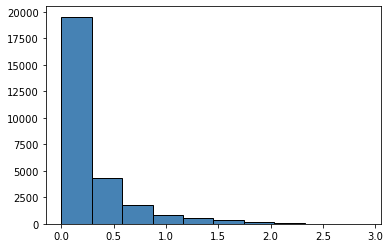

In [75]:
# Exploratory Data Analysis - Data visualization
# #Followers
plt.hist(raw_data['#Followers'].value_counts().apply(np.log10),bins=10,
        color="steelblue",
        edgecolor="black")

(array([7.838e+03, 1.266e+03, 1.051e+03, 6.680e+02, 4.410e+02, 4.190e+02,
        3.070e+02, 7.200e+01, 2.000e+00, 1.000e+00]),
 array([0.        , 0.30358298, 0.60716597, 0.91074895, 1.21433193,
        1.51791491, 1.8214979 , 2.12508088, 2.42866386, 2.73224684,
        3.03582983]),
 <a list of 10 Patch objects>)

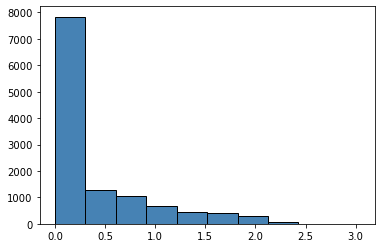

In [76]:
# #Friends
plt.hist(raw_data['#Friends'].value_counts().apply(np.log10),bins=10,
        color="steelblue",
        edgecolor="black")

(array([1.435e+03, 4.760e+02, 2.460e+02, 1.160e+02, 5.300e+01, 1.900e+01,
        6.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.47710066, 0.95420131, 1.43130197, 1.90840263,
        2.38550328, 2.86260394, 3.33970459, 3.81680525, 4.29390591,
        4.77100656]),
 <a list of 10 Patch objects>)

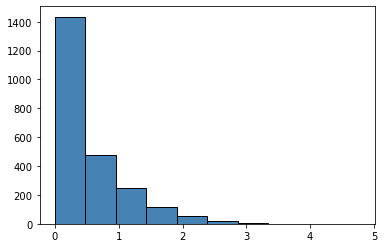

In [79]:
# #Favorites
plt.hist(raw_data['#Favorites'].value_counts().apply(np.log10),bins=10,
        color="steelblue",
        edgecolor="black")

In [80]:
# Show the correlation matrix
corr_matrix = pd.DataFrame(raw_data, columns=['#Retweets', '#Followers', '#Friends', '#Favorites', 'positive_sentiment', 'negative_sentiment'])
corr_matrix.corr(method ='pearson')


,#Retweets,#Followers,#Friends,#Favorites,positive_sentiment,negative_sentiment
#Retweets,1.000000,0.134503,0.026502,0.890328,0.000433,-0.010565
#Followers,0.134503,1.000000,0.011337,0.172158,-0.027071,0.008711
#Friends,0.026502,0.011337,1.000000,0.017877,-0.000555,-0.007891
#Favorites,0.890328,0.172158,0.017877,1.000000,0.002533,-0.003889
positive_sentiment,0.000433,-0.027071,-0.000555,0.002533,1.000000,-0.039849
negative_sentiment,-0.010565,0.008711,-0.007891,-0.003889,-0.039849,1.000000


In [81]:
# Split the dataset into train set and test set

train_data = raw_data.head(80000)
test_data = raw_data.tail(20000)

In [82]:
train_x.describe().T

,count,mean,std,min,25%,50%,75%,max
#Followers,80000.0,172676.358138,1.842147e+06,0.0,190.0,964.0,6500.25,78674340.0
#Friends,80000.0,3160.484475,1.685946e+04,0.0,181.0,525.0,1526.00,1847681.0
#Favorites,80000.0,111.651337,1.373373e+03,0.0,0.0,0.0,15.00,185624.0
positive_sentiment,80000.0,1.633037,7.806463e-01,1.0,1.0,1.0,2.00,5.0
negative_sentiment,80000.0,-1.619938,1.005151e+00,-5.0,-2.0,-1.0,-1.00,-1.0


In [27]:
train_y

0         0
1        13
2         0
3         0
4        26
         ..
79995     1
79996     2
79997     0
79998     0
79999     0
Name: #Retweets, Length: 80000, dtype: int64

In [26]:
train_y.value_counts()

0       44659
1        6382
2        3002
3        2090
4        1596
        ...  
1429        1
1813        1
1877        1
2005        1
9659        1
Name: #Retweets, Length: 1107, dtype: int64

In [23]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [24]:
# Random Forest
train_x = train_data[['#Followers', '#Friends', '#Favorites', 'positive_sentiment', 'negative_sentiment']]
train_y = train_data['#Retweets']
test_x = test_data[['#Followers', '#Friends', '#Favorites', 'positive_sentiment', 'negative_sentiment']]
test_y = test_data['#Retweets']

In [28]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=15,
                             min_samples_split=2,
                             random_state=0)
scores = cross_val_score(rfc, train_x, train_y, cv=10)
print (scores.mean(),scores.var())
#plt.boxplot(scores)

/Users/xiangli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6165375 4.987656250000012e-06


In [29]:
rfc.fit(train_x, train_y)

RandomForestClassifier(max_depth=15, random_state=0)

In [30]:
predictions = rfc.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 21.92 degrees.


In [31]:
# KNN

In [100]:
scaler = StandardScaler()
scaler.fit(train_x)

train_xsc = scaler.transform(train_x)
test_xsc = scaler.transform(test_x)

In [101]:
train_xsc

array([[-0.09340103, -0.14178982, -0.0812977 ,  0.47007818,  0.6167647 ],
       [-0.07399637,  0.95991324, -0.06891933, -0.81091969, -2.36788149],
       [-0.09101304, -0.07280733, -0.0812977 ,  0.47007818,  0.6167647 ],
       ...,
       [-0.09337877, -0.08105202, -0.0812977 ,  0.47007818, -0.37811736],
       [-0.08990454, -0.12814754, -0.0812977 , -0.81091969,  0.6167647 ],
       [-0.09232184, -0.11106503, -0.0812977 ,  0.47007818,  0.6167647 ]])

In [102]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(train_xsc, train_y)
y_pred = neigh.predict(test_xsc)

In [104]:
errors_knn = abs(y_pred - test_y)
print('Mean Absolute Error:', round(np.mean(errors_knn), 2), 'degrees.')

Mean Absolute Error: 16.49 degrees.


In [ ]:
# SVM

In [105]:
from sklearn import svm
regr = svm.SVR()
regr.fit(train_xsc, train_y)
y_pred = regr.predict(test_xsc)
errors_knn = abs(y_pred - test_y)
print('Mean Absolute Error:', round(np.mean(errors_knn), 2), 'degrees.')

Mean Absolute Error: 21.45 degrees.
